# Inverse matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size 

## 7.1 Inverse matrix
- 마치 행렬을 취소하는 것과 같음
- 행렬을 단위 행렬로 선형 변환함

## 7.2 Types of inverse matrices and conditions for invertibility

- 완전 역행렬

    - (1) 정방 (2) 최대계수 : 모든 정방 최대계수 행렬은 역행렬을 가지고, 완전 역행렬을 갖는 모든 행렬은 정방이며 최대계수이다.

- 단방향 역행렬 

    - 정방이 아닌 행렬을 단위 행렬로 변환할 수 있지만 하나의 곱셈 방향에 대해서만 동작한다 
    - LT = I (o) : high T (left inverse matrix)  N ( 최대 열 계수 )
    - WR = I (o) : wide W (right inverse matrix) M ( 최대 행 계수 )
    - 최대로 가능한 계수일때만 단방향 역행렬을 가진다 

- 의사 역행렬 (pseudo inverse)

    - 모든 행렬에는 모양과 계수에 관계없이 의사역행렬이 존재한다.
    - 완전 역행렬 또는 단방향 역행렬이 존재 하지 않는 행렬을 특이 또는 비가역 행렬이라고 한다.
    - reduced-rank, rank-deficient 

- Full Inverse Matrix

    - (1) Square (2) Full rank: Every square full-rank matrix has an inverse, and every matrix that has a full inverse must be square and full-rank.

- One-Sided Inverse Matrix

    - A non-square matrix can be transformed into an identity matrix, but it works only in one multiplication direction.
    - 𝐿𝑇 = 𝐼 : Tall matrix 𝑇  (left inverse matrix) → requires full column rank.
    - 𝑊𝑅 = 𝐼 : Wide matrix 𝑊 (right inverse matrix) → requires full row rank.
    - A matrix possesses a one-sided inverse only when it has the maximum possible rank.

- Pseudo-Inverse (Moore–Penrose Inverse)
    - Every matrix has a pseudo-inverse regardless of its shape or rank.
    - A matrix that does not have a full inverse or a one-sided inverse is called singular or non-invertible.
    - Applies to reduced-rank or rank-deficient cases.


## 7.3 Calculation of inverse matrix

In [4]:
# a matrix
A = np.array([ [1, 4] , [2, 7]])

# its inverse
Ainv = np.linalg.inv(A)

A@Ainv

array([[1., 0.],
       [0., 1.]])

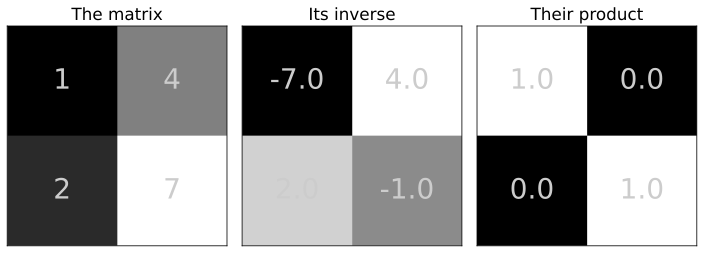

In [5]:
# The matrices visualized

fig,axs = plt.subplots(1,3,figsize=(10,6))

# the matrix
axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j,i),num in np.ndenumerate(A):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

# its inverse
axs[1].imshow(Ainv,cmap='gray')
axs[1].set_title('Its inverse')
for (j,i),num in np.ndenumerate(Ainv):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

# their product
AAi = A@Ainv
axs[2].imshow(AAi,cmap='gray')
axs[2].set_title('Their product')
for (j,i),num in np.ndenumerate(AAi):
  axs[2].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)


# common properties
for i in range(3):
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.show()
     

In [ ]:
# non-invertable, rank 1 (reduced-rank) 

# a matrix
B = np.array([ [1, 4] , [2, 8]])

# its inverse
Binv = np.linalg.inv(B) 

B@Binv

# Singular matrix(특이 행렬) : 역행렬은 존재 하지 않으나, 의사 역행렬은 존재한다

LinAlgError: Singular matrix

### 7.3.2. Inverse of a diagonal matrix
- 각 대각 원소를 뒤집는 것 

In [ ]:
D = np.diag( np.arange(1,6) )
Dinv = np.linalg.inv(D)

print('The diagonal matrix:')
print(D), print(' ')

print('Its inverse:') # invert the value
print(Dinv), print(' ')

print('Their product:')
print(D@Dinv)

The diagonal matrix:
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
 
Its inverse:
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]
 
Their product:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 7.3.3 임의의 정방 최대 계수 행렬의 역행렬

### 7.3.4. The left-inverse ⭐️
- 최대 열 계수를 갖는 높은 행렬에 대해만 정의된다!! M > N , 행렬의 계수가 r = N 이여야함!

In [16]:
# making an invertible square matrix from a tall full column-rank matrix

# here's a tall matrix.
T = np.random.randint(-10, 11, size = (40, 4))

# confirm that it has its maximum possible rank (full column-rank)
print( f'This matrix has rank={np.linalg.matrix_rank(T)}\n\n' )

# next, create a square full-rank matrix
TtT = T.T@T

TtT 

This matrix has rank=4




array([[1675,   24,   32,  118],
       [  24, 1349,   50,   82],
       [  32,   50, 1543,   56],
       [ 118,   82,   56, 1466]])

In [19]:
# check whether it has an inverse
TtT_inv = np.linalg.inv(TtT)
print(TtT_inv@TtT)
print( np.round(TtT_inv@TtT,4) )

[[ 1.00000000e+00 -1.70761842e-18  3.36102673e-18 -3.76760255e-18]
 [-1.35525272e-20  1.00000000e+00  2.76471554e-18 -9.62229428e-19]
 [-6.81014490e-18 -1.40268656e-18  1.00000000e+00 -3.99799551e-19]
 [ 2.60208521e-17  1.73472348e-18 -6.93889390e-18  1.00000000e+00]]
[[ 1. -0.  0. -0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1. -0.]
 [ 0.  0. -0.  1.]]


In [ ]:
# finish creating the left-inverse

# our left-inverse ⭐️
L = TtT_inv @ T.T  

# confirm that it works - Identity matrix 
print( np.round( L@T,6 ) ), print(' ')

# but it's one-sided!
print( np.round( T@L,6 ) )



[[ 1.  0.  0.  0.]
 [-0.  1.  0. -0.]
 [-0.  0.  1. -0.]
 [-0.  0. -0.  1.]]
 
[[ 1.12753e-01  1.68760e-02 -4.14490e-02 ...  5.08540e-02 -2.42950e-02
   4.37750e-02]
 [ 1.68760e-02  8.55710e-02  3.68710e-02 ...  9.67800e-02  3.40380e-02
   2.66810e-02]
 [-4.14490e-02  3.68710e-02  4.97560e-02 ... -1.24000e-04  2.32530e-02
  -2.68730e-02]
 ...
 [ 5.08540e-02  9.67800e-02 -1.24000e-04 ...  1.82290e-01  5.09110e-02
   9.16580e-02]
 [-2.42950e-02  3.40380e-02  2.32530e-02 ...  5.09110e-02  1.57765e-01
   3.75410e-02]
 [ 4.37750e-02  2.66810e-02 -2.68730e-02 ...  9.16580e-02  3.75410e-02
   6.50610e-02]]


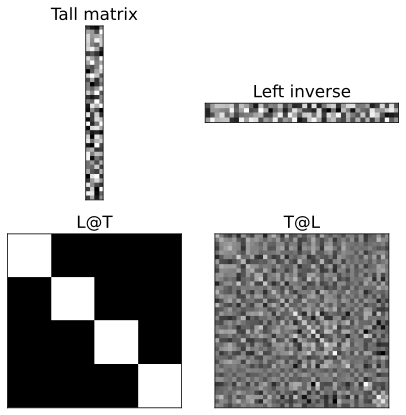

In [22]:
# visualize

fig,axs = plt.subplots(2,2,figsize=(6,6))

axs[0,0].imshow(T,cmap='gray')
axs[0,0].set_title('Tall matrix')

axs[0,1].imshow(L,cmap='gray')
axs[0,1].set_title('Left inverse')

axs[1,0].imshow(L@T,cmap='gray')
axs[1,0].set_title('L@T')

axs[1,1].imshow(T@L,cmap='gray')
axs[1,1].set_title('T@L')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()
     

### Exercise 4

## 7.4 Uniqueness of inverse

## 7.5 Moore-Penrose pseudo inverse matrix
- 축소 계수 행렬은 의사역행렬들을 가진다 (pseudo inverses) : not unique 
- 의사 역행렬 : 행렬을 단위행렬에 가깝게 만드는 변환 행렬


In [24]:
# The same singular matrix as before
A = np.array([ [1,4],[2,8] ])

# its inverse 
Apinv = np.linalg.pinv(A)
print(Apinv * 85), print(' ')

# does it produce the identity matrix?
A@Apinv

[[1. 2.]
 [4. 8.]]
 


array([[0.2, 0.4],
       [0.4, 0.8]])

## 7.6 Numerical stability of matrix inversion

## 7.7 Geometrical interpretation of matrix inversion